# Boxcar for Image-Derived Input Functions

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np

# inline plotting
%matplotlib inline

# plotting
import matplotlib
from matplotlib import pyplot as plt

# seed the random number generator
# rstate = np.random.default_rng(916301)

In [2]:
singularity = "/Volumes/PrecunealSSD/Singularity"
niis = {
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421144815", "pet", 
    "sub-108293_ses-20210421144815_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
    "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421154248", "pet", 
    "sub-108293_ses-20210421154248_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
   "CCIR_01211", "derivatives", "sub-108293", "ses-20210421155709", "pet", 
   "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031100910", "pet", 
    "sub-108237_ses-20221031100910_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031102320", "pet", 
    "sub-108237_ses-20221031102320_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031103712", "pet", 
    "sub-108237_ses-20221031103712_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031110638", "pet", 
    "sub-108237_ses-20221031110638_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031113804", "pet", 
    "sub-108237_ses-20221031113804_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116095143", "pet", 
    "sub-108254_ses-20221116095143_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116100858", "pet", 
    "sub-108254_ses-20221116100858_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116102328", "pet", 
    "sub-108254_ses-20221116102328_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116104751", "pet", 
    "sub-108254_ses-20221116104751_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116115244", "pet", 
    "sub-108254_ses-20221116115244_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207093856", "pet", 
    "sub-108250_ses-20221207093856_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207095507", "pet", 
    "sub-108250_ses-20221207095507_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207100946", "pet", 
    "sub-108250_ses-20221207100946_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207102944", "pet", 
    "sub-108250_ses-20221207102944_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207104909", "pet", 
    "sub-108250_ses-20221207104909_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220093702", "pet", 
    "sub-108284_ses-20230220093702_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220095210", "pet", 
    "sub-108284_ses-20230220095210_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220101103", "pet", 
    "sub-108284_ses-20230220101103_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220103226", "pet", 
    "sub-108284_ses-20230220103226_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220112328", "pet", 
    "sub-108284_ses-20230220112328_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227103048", "pet", 
    "sub-108306_ses-20230227103048_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227104631", "pet", 
    "sub-108306_ses-20230227104631_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227112148", "pet", 
    "sub-108306_ses-20230227112148_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227113853", "pet", 
    "sub-108306_ses-20230227113853_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227115809", "pet", 
    "sub-108306_ses-20230227115809_trc-fdg_proc-MipIdif_idif.nii.gz")}

In [3]:
from Boxcar import Boxcar

In [4]:
# define model
input_func_measurement = os.path.join(singularity, 
                                      "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
                                      "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
bc = Boxcar(input_func_measurement, nlive=3000) # 1000
bc.data(bc.truths)

{'timesMid': array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 40., 80.]),
 'taus': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 20., 20.]),
 'v': [8.95,
  2.34,
  6.05,
  4.43,
  4.23,
  4.24,
  -2.0,
  -0.36,
  8.69,
  0.49,
  0.19,
  0.084,
  2.56,
  0.001]}

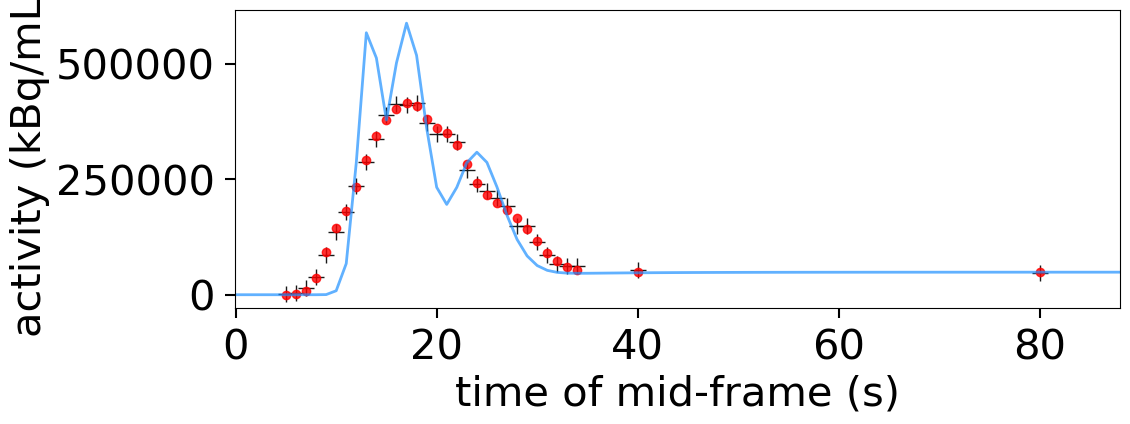

In [5]:
bc.plot_truths()

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [6]:
# de novo
res = bc.run_nested()

# restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True)
# res = sampler.results

iter: 3000 | batch: 0 | bound: 0 | nc: 2 | ncall: 5333 | eff(%): 36.001 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.057 | dlogz:    inf >  0.010                                       IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

iter: 253957 | batch: 0 | bound: 232 | nc: 1 | ncall: 23303865 | eff(%):  1.090 | loglstar:   -inf < -4764.641 <    inf | logz: -4842.912 +/-  0.155 | dlogz:  0.001 >  0.010                         IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerAp

In [7]:
res.summary()

Summary
niter: 254106
ncall: 23304014
eff(%):  1.090
logz: -4842.912 +/-  0.159


In [8]:
#type(res)

In [9]:
#res

In [10]:
bc.save_results(res)

Parameter 0: 8.984 [8.842, 9.081]
Parameter 1: 2.395 [2.279, 2.498]
Parameter 2: 6.306 [6.125, 6.482]
Parameter 3: 3.841 [3.634, 4.118]
Parameter 4: 4.533 [4.455, 4.633]
Parameter 5: 5.294 [5.190, 5.362]
Parameter 6: -2.976 [-2.999, -2.881]
Parameter 7: -0.367 [-0.429, -0.306]
Parameter 8: 8.932 [7.731, 10.037]
Parameter 9: 0.489 [0.486, 0.492]
Parameter 10: 0.187 [0.186, 0.189]
Parameter 11: 0.085 [0.083, 0.086]
Parameter 12: 2.456 [0.597, 4.396]
Parameter 13: 0.001 [0.001, 0.001]


Parameter 0: 8.984 [8.842, 9.081]
Parameter 1: 2.395 [2.279, 2.498]
Parameter 2: 6.306 [6.125, 6.482]
Parameter 3: 3.841 [3.634, 4.118]
Parameter 4: 4.533 [4.455, 4.633]
Parameter 5: 5.294 [5.190, 5.362]
Parameter 6: -2.976 [-2.999, -2.881]
Parameter 7: -0.367 [-0.429, -0.306]
Parameter 8: 8.932 [7.731, 10.037]
Parameter 9: 0.489 [0.486, 0.492]
Parameter 10: 0.187 [0.186, 0.189]
Parameter 11: 0.085 [0.083, 0.086]
Parameter 12: 2.456 [0.597, 4.396]
Parameter 13: 0.001 [0.001, 0.001]


/Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


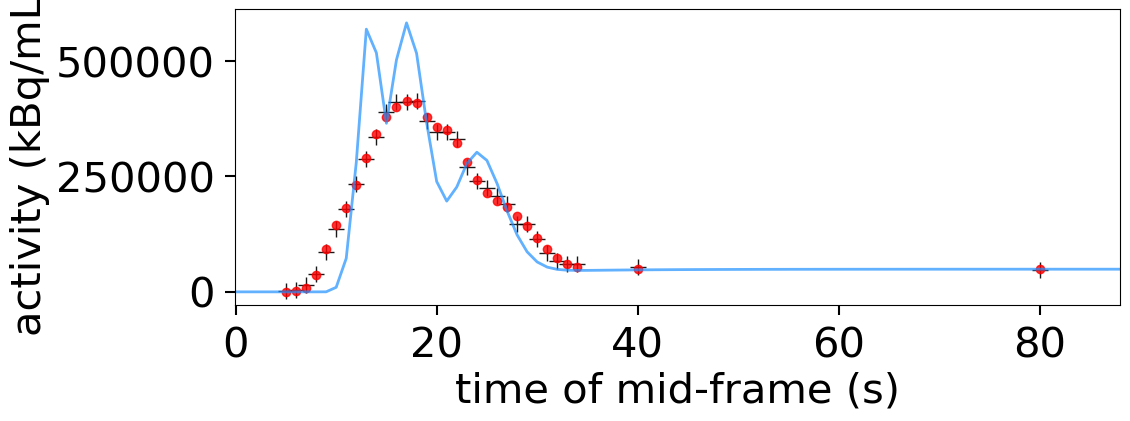

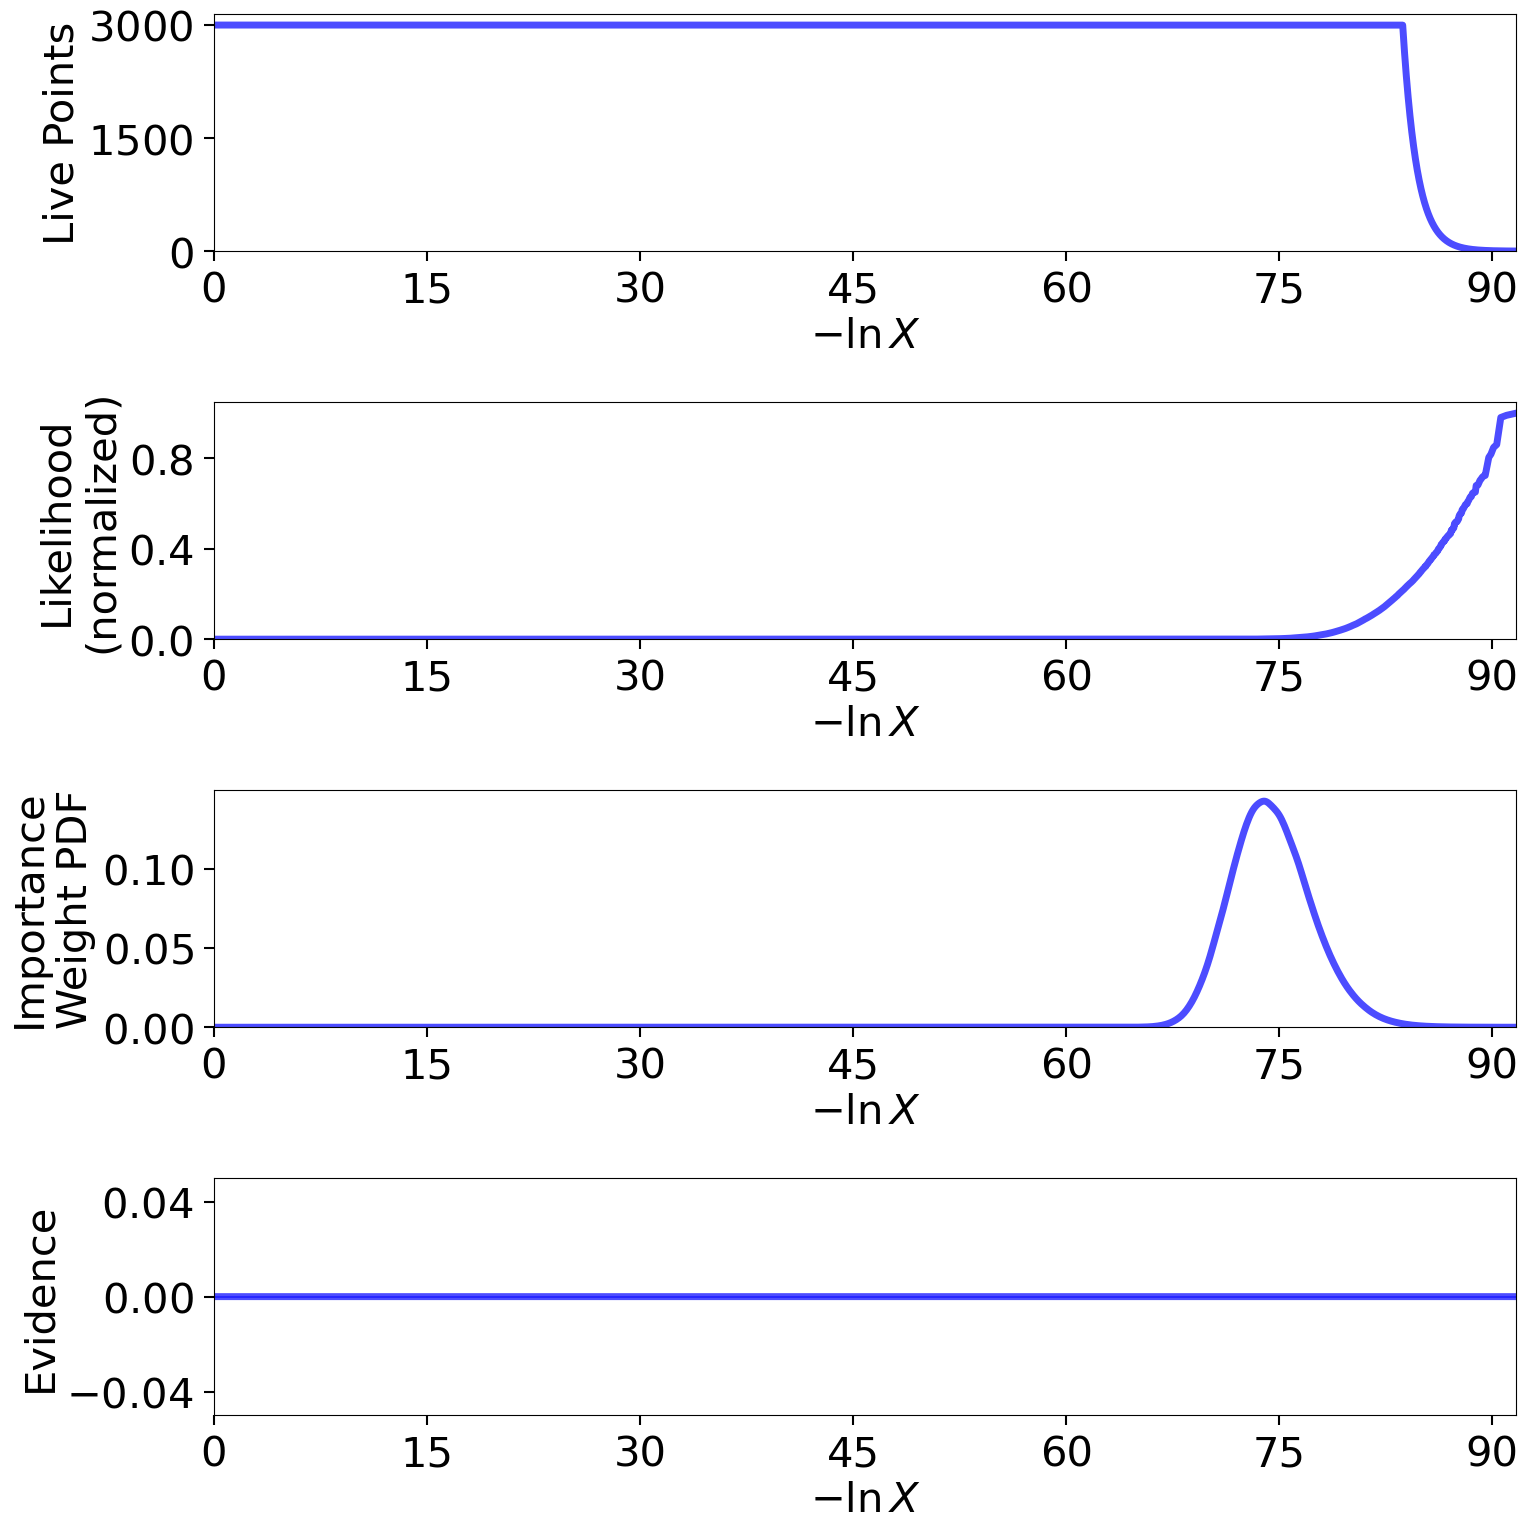

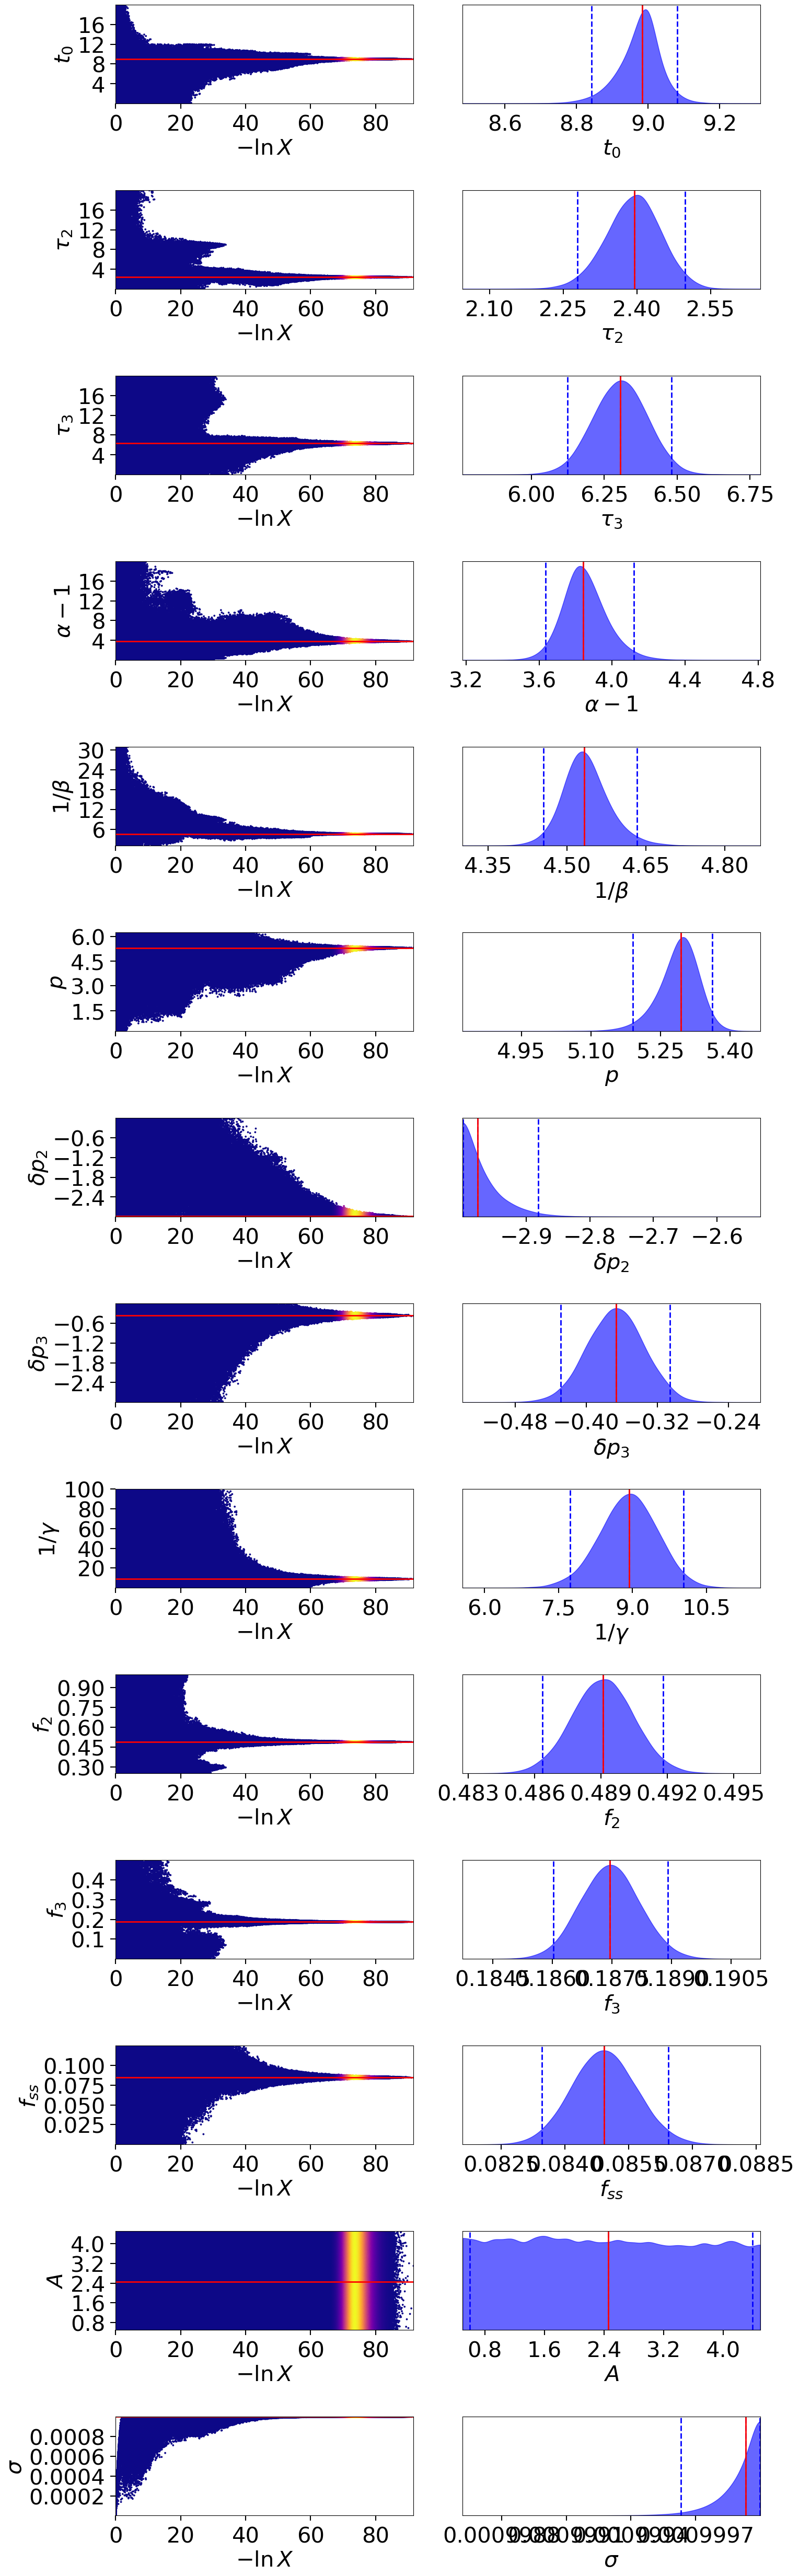

In [11]:
bc.plot_results(res)